In [1]:
import pandas as pd

train = pd.read_csv('data/customer_segmentation/Train.csv')
test = pd.read_csv('data/customer_segmentation/Test.csv')
df = pd.concat([train, test], axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45211 entries, 0 to 13563
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                45211 non-null  object 
 1   customer_age                      44322 non-null  float64
 2   job_type                          45211 non-null  object 
 3   marital                           44980 non-null  object 
 4   education                         45211 non-null  object 
 5   default                           45211 non-null  object 
 6   balance                           44631 non-null  float64
 7   housing_loan                      45211 non-null  object 
 8   personal_loan                     44988 non-null  object 
 9   communication_type                45211 non-null  object 
 10  day_of_month                      45211 non-null  int64  
 11  month                             45211 non-null  object 
 12  last_cont

In [2]:
df.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0.0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0.0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0.0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0.0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0.0


<Axes: >

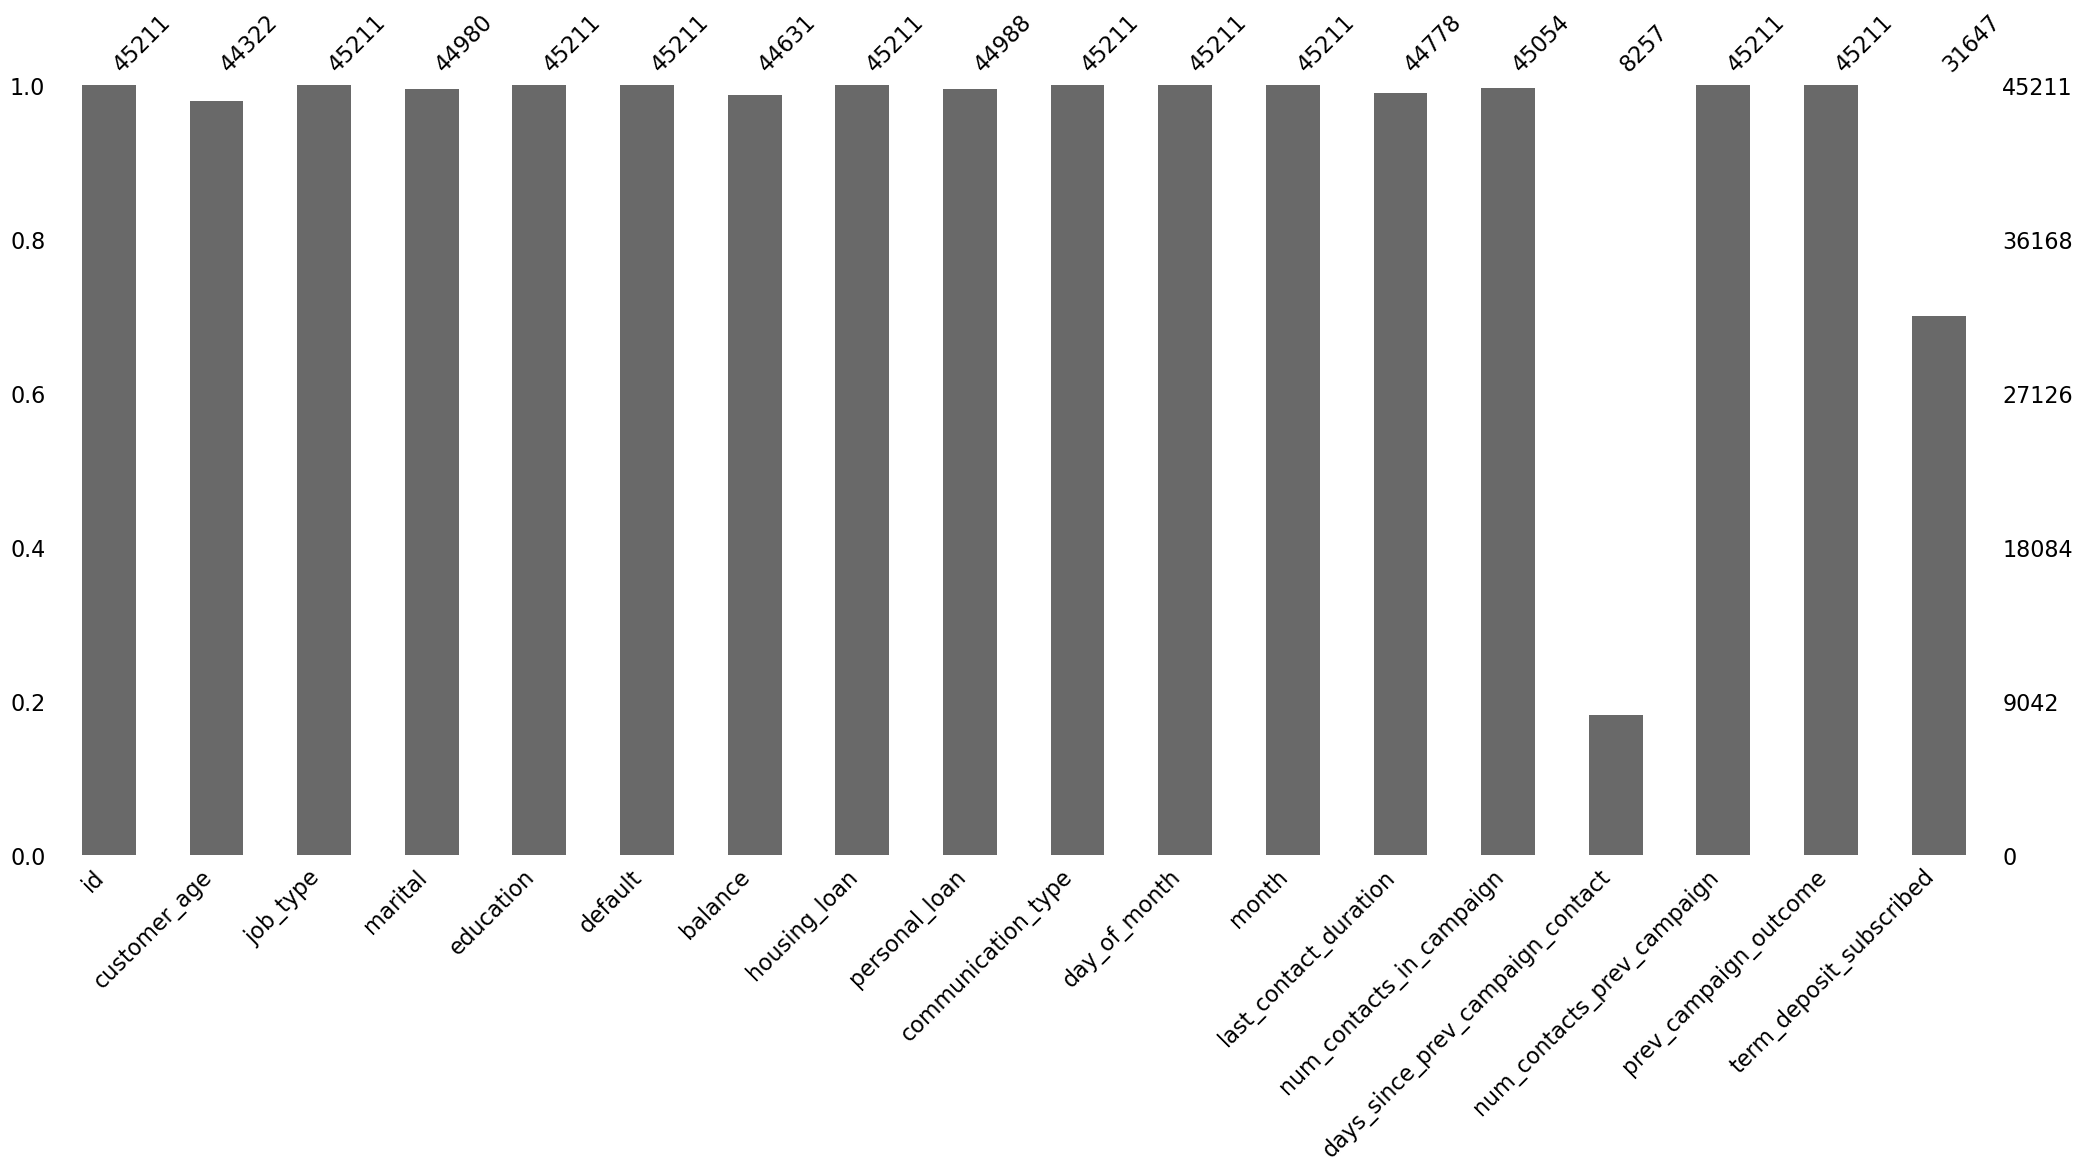

In [3]:
import seaborn as sns
import pandas as pd
import missingno as msno
%matplotlib inline
msno.bar(df)

<Axes: >

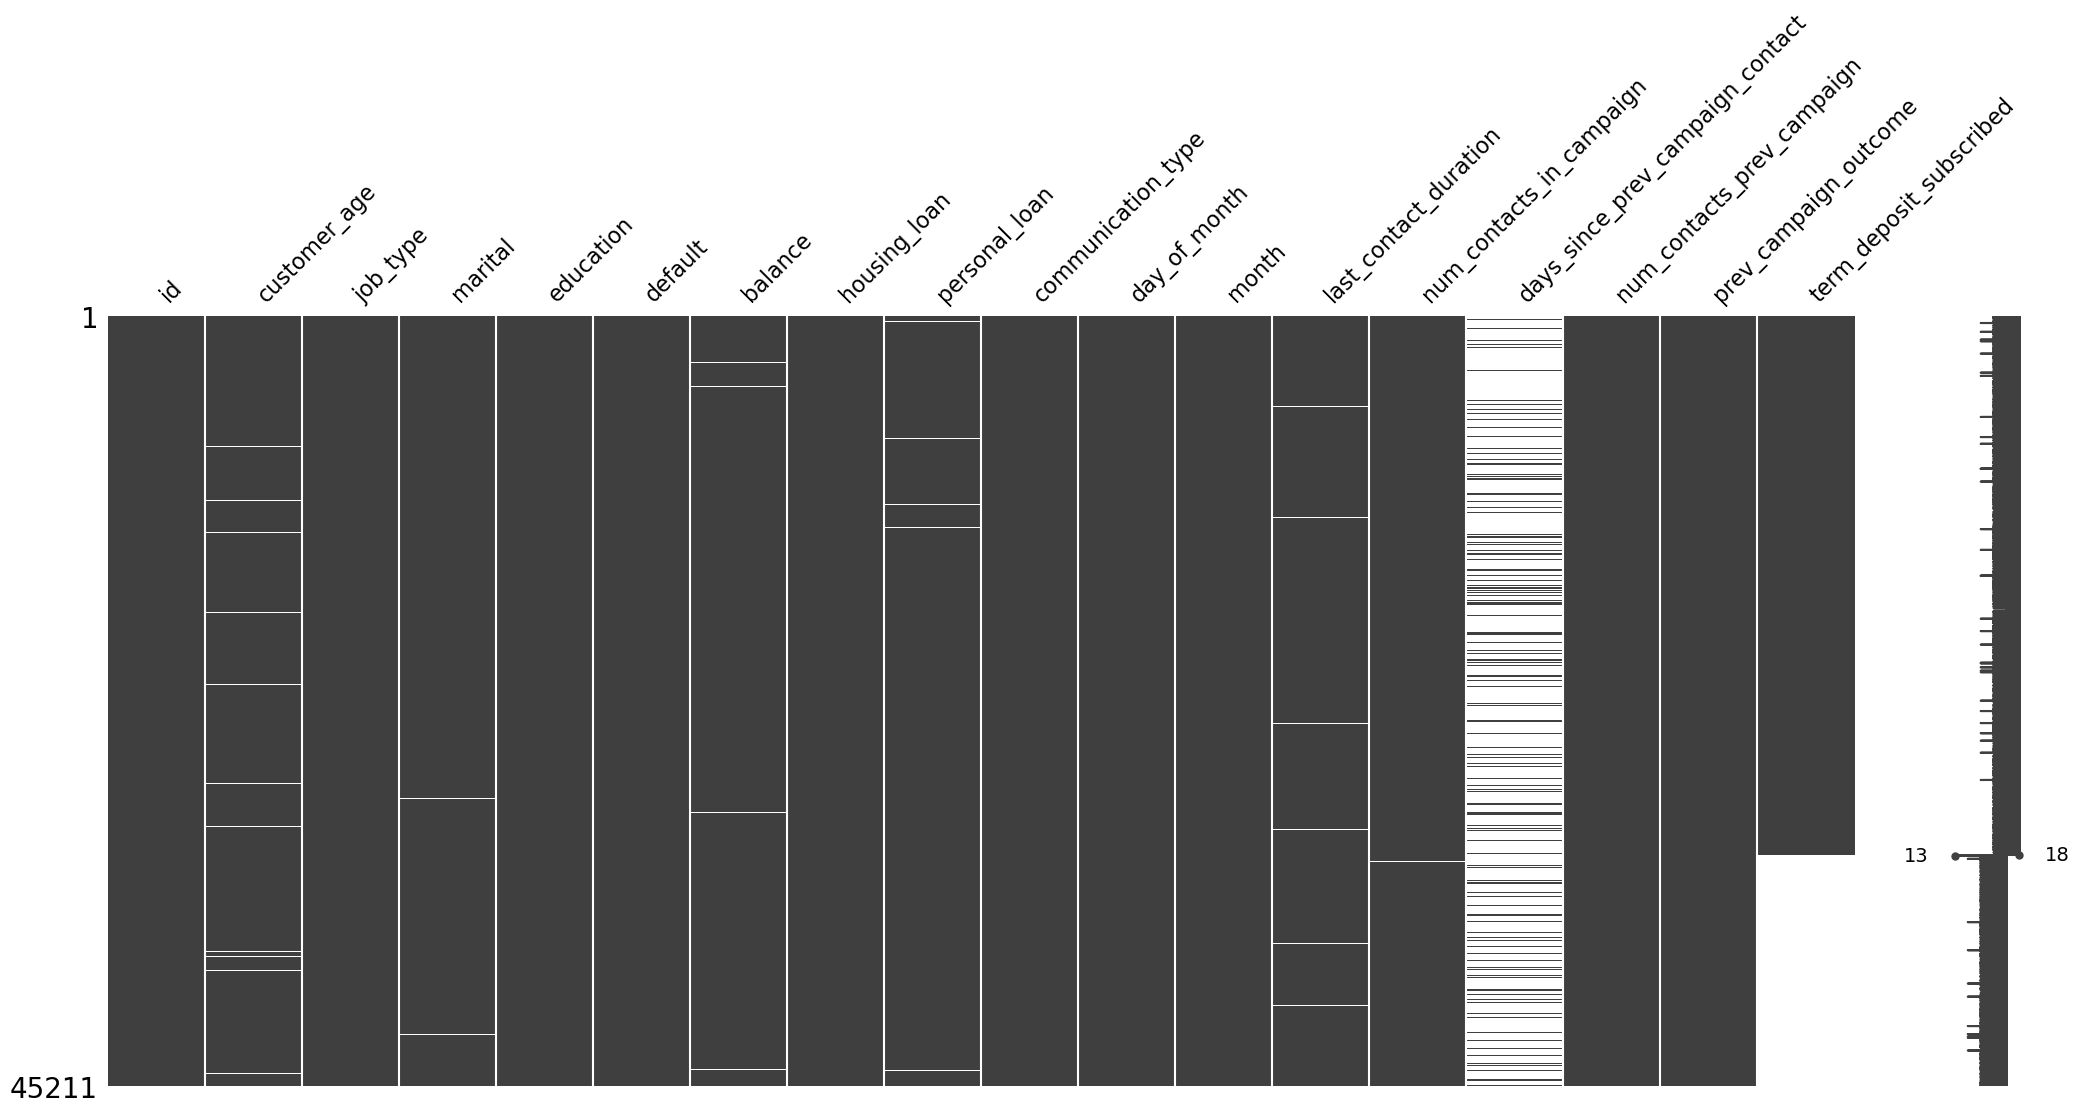

In [4]:
msno.matrix(df)

In [5]:
df.dropna(subset=['term_deposit_subscribed'], inplace=True)
df

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0.0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0.0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0.0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0.0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,id_27290,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,2,feb,99.0,2.0,265.0,3,other,0.0
31643,id_20428,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,31.0,7.0,NaN,0,unknown,0.0
31644,id_44679,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,89.0,2.0,NaN,0,unknown,0.0
31645,id_4841,48.0,services,married,secondary,no,2699.0,no,no,cellular,11,aug,216.0,6.0,NaN,0,unknown,0.0


In [6]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode=['job_type','marital','education','default','housing_loan','personal_loan','communication_type',\
                 'day_of_month','month','prev_campaign_outcome']

le = LabelEncoder()

for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])

df.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,4,2,2,0,285.0,1,0,2,25,6,303.0,4.0,NaN,0,3,0.0
1,id_32289,34.0,1,1,1,0,934.0,0,1,0,17,9,143.0,2.0,132.0,1,1,0.0
2,id_10523,46.0,9,1,1,0,656.0,0,0,0,4,3,101.0,4.0,NaN,0,3,0.0
3,id_43951,34.0,7,2,1,0,2.0,1,0,2,19,8,127.0,3.0,NaN,0,3,0.0
4,id_40992,41.0,1,1,0,0,1352.0,1,0,0,12,8,49.0,2.0,NaN,0,3,0.0


In [7]:
df.drop(['id','days_since_prev_campaign_contact'], axis=1, inplace=True)
df.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,28.0,4,2,2,0,285.0,1,0,2,25,6,303.0,4.0,0,3,0.0
1,34.0,1,1,1,0,934.0,0,1,0,17,9,143.0,2.0,1,1,0.0
2,46.0,9,1,1,0,656.0,0,0,0,4,3,101.0,4.0,0,3,0.0
3,34.0,7,2,1,0,2.0,1,0,2,19,8,127.0,3.0,0,3,0.0
4,41.0,1,1,0,0,1352.0,1,0,0,12,8,49.0,2.0,0,3,0.0


In [8]:
from reparo import MICE
from sklearn.impute import SimpleImputer


columns_to_imput = ['customer_age', 'job_type','balance','personal_loan','last_contact_duration','num_contacts_in_campaign']
imputer = SimpleImputer(strategy='most_frequent')

imputer.fit(df[columns_to_imput])
df[columns_to_imput] = imputer.transform(df[columns_to_imput])
df

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,28.0,4.0,2,2,0,285.0,1,0.0,2,25,6,303.0,4.0,0,3,0.0
1,34.0,1.0,1,1,0,934.0,0,1.0,0,17,9,143.0,2.0,1,1,0.0
2,46.0,9.0,1,1,0,656.0,0,0.0,0,4,3,101.0,4.0,0,3,0.0
3,34.0,7.0,2,1,0,2.0,1,0.0,2,19,8,127.0,3.0,0,3,0.0
4,41.0,1.0,1,0,0,1352.0,1,0.0,0,12,8,49.0,2.0,0,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,58.0,0.0,1,1,0,567.0,1,0.0,0,1,3,99.0,2.0,3,1,0.0
31643,51.0,4.0,1,2,0,1072.0,0,0.0,2,19,6,31.0,7.0,0,3,0.0
31644,41.0,10.0,1,0,0,242.0,1,0.0,2,22,8,89.0,2.0,0,3,0.0
31645,48.0,7.0,1,1,0,2699.0,0,0.0,0,10,1,216.0,6.0,0,3,0.0


<Axes: >

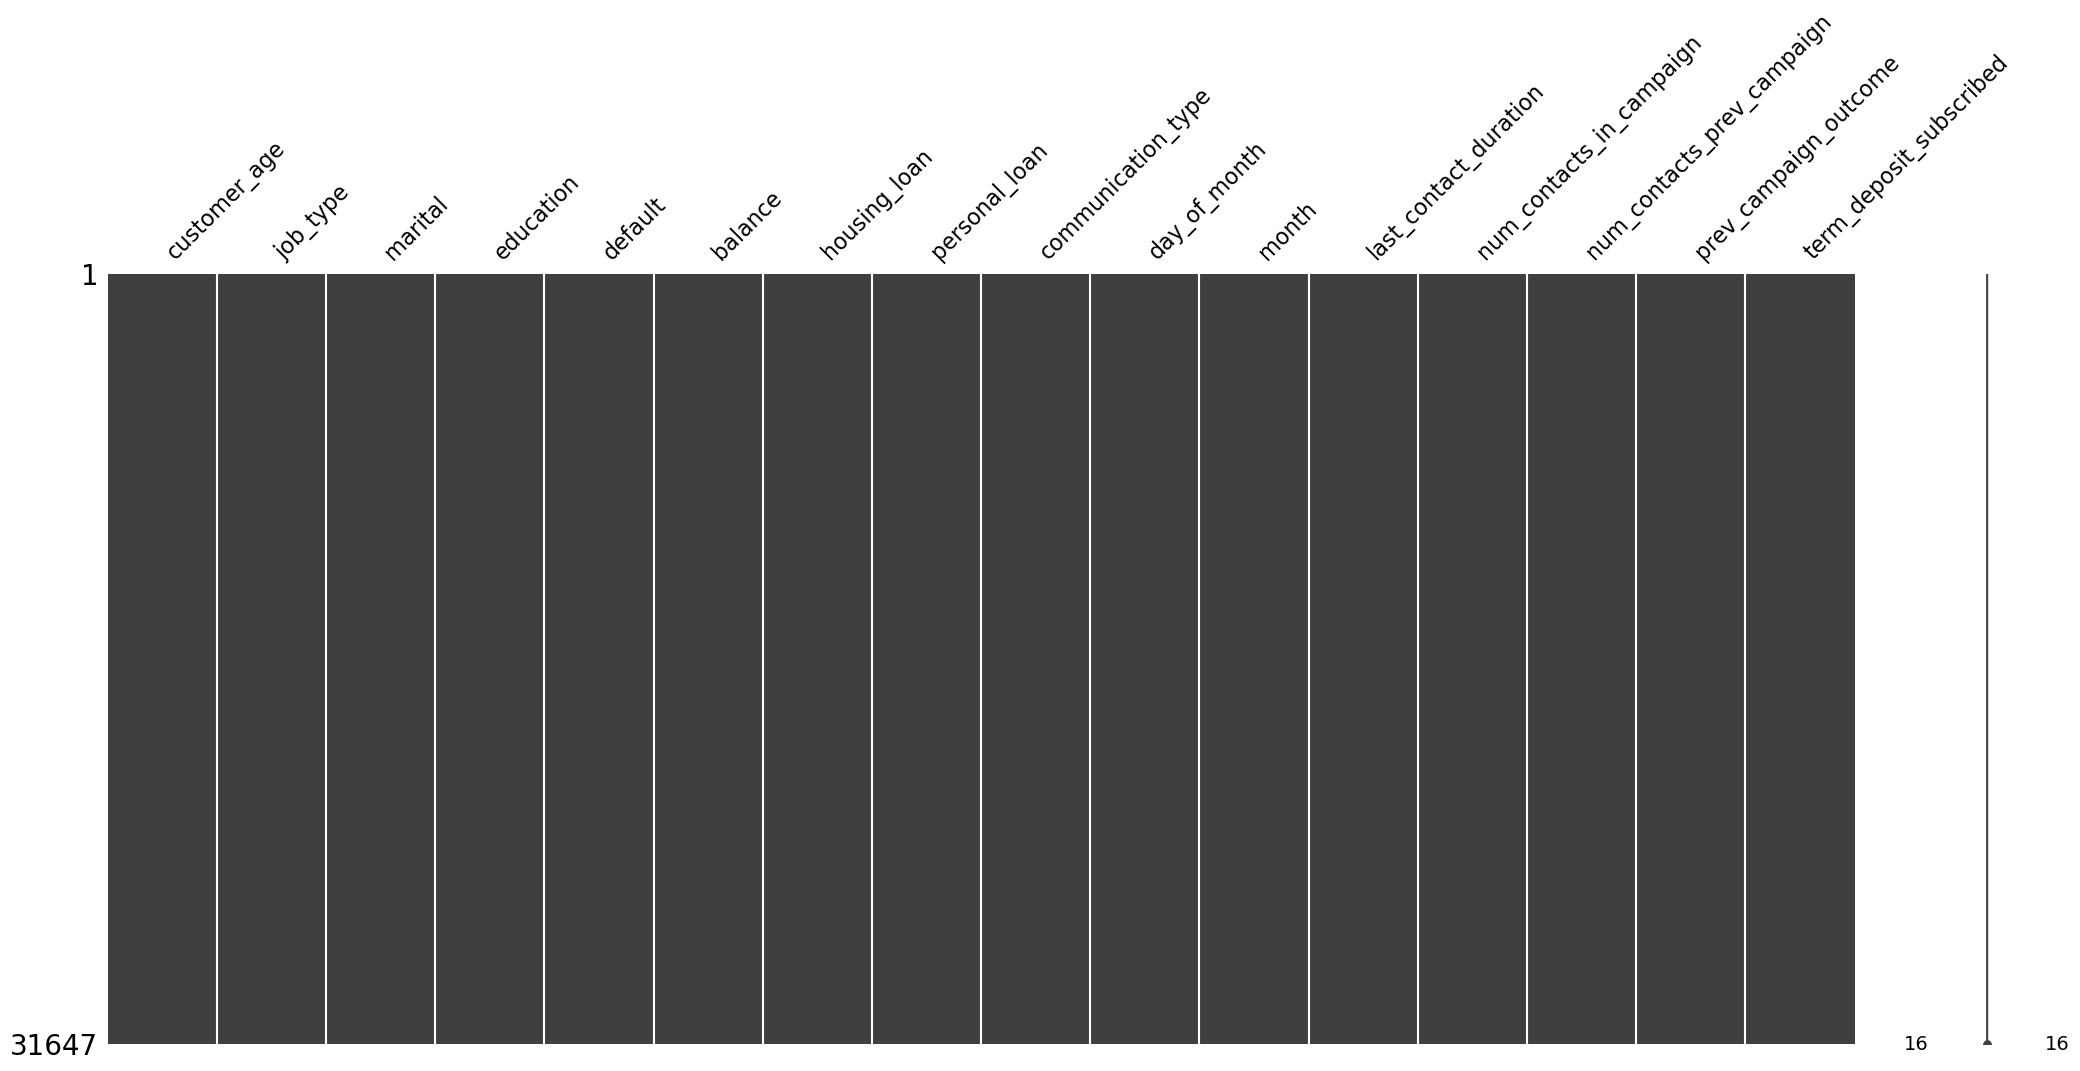

In [9]:
msno.matrix(df)

In [10]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

X = df.drop('term_deposit_subscribed', axis=1)  
y = df['term_deposit_subscribed'] 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

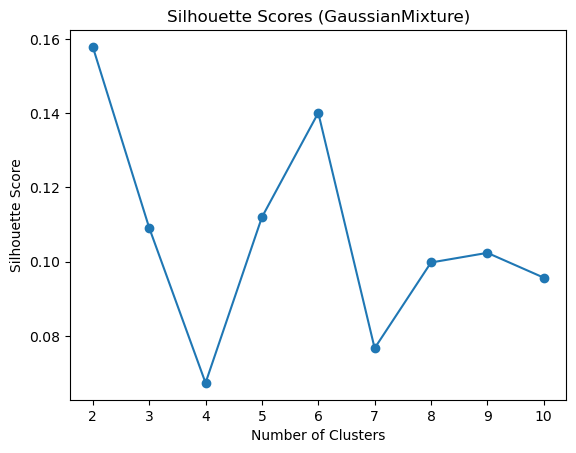

ValueError: Invalid parameter 'n_components' for estimator KMeans(). Valid parameters are: ['algorithm', 'copy_x', 'init', 'max_iter', 'n_clusters', 'n_init', 'random_state', 'tol', 'verbose'].

In [11]:
def find_best_clusters(model, X):
    best_score = -1
    best_clusters = 2  # Start with a minimum of 2 clusters
    silhouette_scores = []

    for n_clusters in range(2, 11):  # You can adjust the range as needed
        model.set_params(n_components=n_clusters)
        labels = model.fit_predict(X)
        silhouette_avg = silhouette_score(X, labels)
        silhouette_scores.append(silhouette_avg)

        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_clusters = n_clusters

    plt.plot(range(2, 11), silhouette_scores, marker='o')
    plt.title(f'Silhouette Scores ({type(model).__name__})')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

    return best_clusters

# For GMM
gmm = GaussianMixture()
best_clusters_gmm = find_best_clusters(gmm, X_scaled)

# For KMeans
kmeans = KMeans()
best_clusters_kmeans = find_best_clusters(kmeans, X_scaled)